## **Load Liberaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## **Loading Datasets** 

### **1- Total Gross**

* ####  **Loading and Exploring the Dataset**

In [2]:
total_gross = pd.read_csv('disney_movies_total_gross.csv')
total_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,"Dec 21, 1937",Musical,G,"$184,925,485","$5,228,953,251"
1,Pinocchio,"Feb 9, 1940",Adventure,G,"$84,300,000","$2,188,229,052"
2,Fantasia,"Nov 13, 1940",Musical,G,"$83,320,000","$2,187,090,808"
3,Song of the South,"Nov 12, 1946",Adventure,G,"$65,000,000","$1,078,510,579"
4,Cinderella,"Feb 15, 1950",Drama,G,"$85,000,000","$920,608,730"


In [3]:
total_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   MPAA_rating               523 non-null    object
 4   total_gross               579 non-null    object
 5   inflation_adjusted_gross  579 non-null    object
dtypes: object(6)
memory usage: 27.3+ KB


In [4]:
total_gross.isna().sum()

movie_title                  0
release_date                 0
genre                       17
MPAA_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [5]:
total_gross.duplicated().sum()

0

#### Data Cleaning
* We will convert `release_date` data type into datetime.
* We will convert both `total_gross` and `inflation_adjusted_gross` into numeric data type.
* We will replace `NaN` values in `genre` and `MPAA_rating` columns with `Generic` and `Not Rated` respectively.

In [6]:
# convereting release_date

total_gross['release_date'] = pd.to_datetime(total_gross['release_date'])

In [7]:
# converting object columns into numeric columns
total_gross[['total_gross','inflation_adjusted_gross']] = total_gross[['total_gross','inflation_adjusted_gross']].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [8]:
# Dealing with "NaN" values
total_gross['genre'].fillna('Generic', inplace=True)

In [9]:
total_gross['MPAA_rating'].fillna('Not Rated', inplace=True)

In [10]:
total_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [11]:
total_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     579 non-null    object        
 3   MPAA_rating               579 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 27.3+ KB


* Saving the dataset as csv file.

In [12]:
total_gross.to_csv('total_gross.csv')

***

### **2- Revenue** 

* ####  **Loading and Exploring the Dataset**

In [13]:
revenue = pd.read_csv('disney_revenue_1991-2016.csv')
revenue.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,NaN,2794.0,NaN,6111
1,1992,3115.0,1081.0,NaN,3306.0,NaN,7502
2,1993,3673.4,1415.1,NaN,3440.7,NaN,8529
3,1994,4793.0,1798.2,NaN,3463.6,359,10414
4,1995,6001.5,2150.0,NaN,3959.8,414,12525


In [14]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             26 non-null     int64  
 1   Studio Entertainment[NI 1]       25 non-null     float64
 2   Disney Consumer Products[NI 2]   24 non-null     float64
 3   Disney Interactive[NI 3][Rev 1]  12 non-null     float64
 4   Walt Disney Parks and Resorts    26 non-null     float64
 5   Disney Media Networks            23 non-null     object 
 6   Total                            26 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.6+ KB


In [15]:
revenue.duplicated().sum()

0

#### Data Cleaning
* We will replace `NaN` values with 0 .
* We will convert `Disney Media Network` object column to float as the rest of columns.

In [16]:
revenue.fillna(0, inplace=True)

In [17]:
def clean_col(x):
    if isinstance(x,str):
        return x.replace(',','')
    return x


In [18]:
revenue['Disney Media Networks']=revenue['Disney Media Networks'].apply(clean_col).astype(np.float64)
revenue.head()

,Year,Studio Entertainment[NI 1],Disney Consumer Products[NI 2],Disney Interactive[NI 3][Rev 1],Walt Disney Parks and Resorts,Disney Media Networks,Total
0,1991,2593.0,724.0,0.0,2794.0,0.0,6111
1,1992,3115.0,1081.0,0.0,3306.0,0.0,7502
2,1993,3673.4,1415.1,0.0,3440.7,0.0,8529
3,1994,4793.0,1798.2,0.0,3463.6,359.0,10414
4,1995,6001.5,2150.0,0.0,3959.8,414.0,12525


In [19]:
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             26 non-null     int64  
 1   Studio Entertainment[NI 1]       26 non-null     float64
 2   Disney Consumer Products[NI 2]   26 non-null     float64
 3   Disney Interactive[NI 3][Rev 1]  26 non-null     float64
 4   Walt Disney Parks and Resorts    26 non-null     float64
 5   Disney Media Networks            26 non-null     float64
 6   Total                            26 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 1.6 KB


* Saving the dataset as csv file.

In [20]:
revenue.to_csv('revenue.csv')

******

### **3- Disney Characters** 

* ####  **Loading and Exploring the Dataset**

In [21]:
characters = pd.read_csv('disney-characters.csv')
characters.head()

,movie_title,release_date,hero,villian,song
0,\nSnow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,\nPinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,\nFantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,\nBambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [22]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_title   56 non-null     object
 1   release_date  56 non-null     object
 2   hero          52 non-null     object
 3   villian       46 non-null     object
 4   song          47 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [23]:
characters.duplicated().sum()

0

#### Data Cleaning
* We will remove `\n character` from `movie_title` and `Song` columns.
* We will convert `release_date` into datetime data type.
* We will replace `NaN` values with `Not Available`.

In [24]:
# Removing special character from movie_title column
def spec_removal(x):
    if isinstance(x,str):
        return x.replace('\n','')
    return x
    


In [25]:
characters['movie_title'] = characters['movie_title'].apply(spec_removal)
characters['song'] = characters['song'].apply(spec_removal)

In [26]:
characters.head()

,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,"December 21, 1937",Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,"February 7, 1940",Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,"November 13, 1940",NaN,Chernabog,NaN
3,Dumbo,"October 23, 1941",Dumbo,Ringmaster,Baby Mine
4,Bambi,"August 13, 1942",Bambi,Hunter,Love Is a Song


In [27]:
# Convert "release_date" to datetime format
characters['release_date'] = pd.to_datetime(characters['release_date'])

In [28]:
# Replace "NaN" values
characters.fillna('Not Available', inplace=True)

In [29]:
characters.head()

,movie_title,release_date,hero,villian,song
0,Snow White and the Seven Dwarfs,1937-12-21,Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940-02-07,Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,1940-11-13,Not Available,Chernabog,Not Available
3,Dumbo,1941-10-23,Dumbo,Ringmaster,Baby Mine
4,Bambi,1942-08-13,Bambi,Hunter,Love Is a Song


In [30]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_title   56 non-null     object        
 1   release_date  56 non-null     datetime64[ns]
 2   hero          56 non-null     object        
 3   villian       56 non-null     object        
 4   song          56 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 2.3+ KB


* Save the dataset as csv file.

In [31]:
characters.to_csv('characters.csv')

*****

### **4- Disney Director**

* ####  **Loading and Exploring the Dataset**

In [32]:
director = pd.read_csv('disney-director.csv')
director.head()

,name,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


In [33]:
director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      56 non-null     object
 1   director  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [34]:
director.duplicated().sum()

0

In [35]:
# For consistency, we will rename the "name" column.
director.rename(columns={'name': 'movie_title'}, inplace=True)

In [36]:
director.head()

,movie_title,director
0,Snow White and the Seven Dwarfs,David Hand
1,Pinocchio,Ben Sharpsteen
2,Fantasia,full credits
3,Dumbo,Ben Sharpsteen
4,Bambi,David Hand


* All set no further work is needed on this dataset.
* Saving the dataset as csv file.

In [37]:
director.to_csv('director.csv')

*****

### **5- Voice Actor**

* ####  **Loading and Exploring the Dataset**

In [38]:
voice = pd.read_csv('disney-voice-actors.csv')
voice.head()

,character,voice-actor,movie
0,Abby Mallard,Joan Cusack,Chicken Little
1,Abigail Gabble,Monica Evans,The Aristocats
2,Abis Mal,Jason Alexander,The Return of Jafar
3,Abu,Frank Welker,Aladdin
4,Achilles,NaN,The Hunchback of Notre Dame


In [39]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   character    935 non-null    object
 1   voice-actor  882 non-null    object
 2   movie        935 non-null    object
dtypes: object(3)
memory usage: 22.0+ KB


In [40]:
voice['voice-actor'].isna().sum()

53

In [41]:
voice.duplicated().sum()

0

In [42]:
# Filling "NaN" values with "Unknown" instead.
voice.fillna('Unknown')

,character,voice-actor,movie
0,Abby Mallard,Joan Cusack,Chicken Little
1,Abigail Gabble,Monica Evans,The Aristocats
2,Abis Mal,Jason Alexander,The Return of Jafar
3,Abu,Frank Welker,Aladdin
4,Achilles,Unknown,The Hunchback of Notre Dame
...,...,...,...
930,Zeus,Rip Torn,Hercules
931,Ziggy the Vulture,Digby Wolfe,The Jungle Book
932,Zini,Max Casella,Dinosaur
933,Zipper,Corey Burton,Chip 'n Dale Rescue Rangers


In [43]:
# For consistency, we will rename the "movie" column.
voice.rename(columns={'movie': 'movie_title'}, inplace=True)

In [44]:
voice.head()

,character,voice-actor,movie_title
0,Abby Mallard,Joan Cusack,Chicken Little
1,Abigail Gabble,Monica Evans,The Aristocats
2,Abis Mal,Jason Alexander,The Return of Jafar
3,Abu,Frank Welker,Aladdin
4,Achilles,NaN,The Hunchback of Notre Dame


* Saving the dataset as csv file.

In [45]:
voice.to_csv('voice.csv')

***

* ## **Data Analysis**
  

  For our Analysis we will answer the following Questions:
* Q1: Is there a significant relationship between gross and movie ratings?
* Q2: How has this 
changed through the decades
* Q3: Which hero characters generate the highest box office revenues?
* Q4: Q4: Which genre is responsible for the highest revenue?
  
   

****

### Q1:  Is there a significant relationship between gross and movie ratings?

In [46]:
total_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [47]:
total_gross['MPAA_rating'].value_counts()

MPAA_rating
PG           187
PG-13        145
R            102
G             86
Not Rated     59
Name: count, dtype: int64

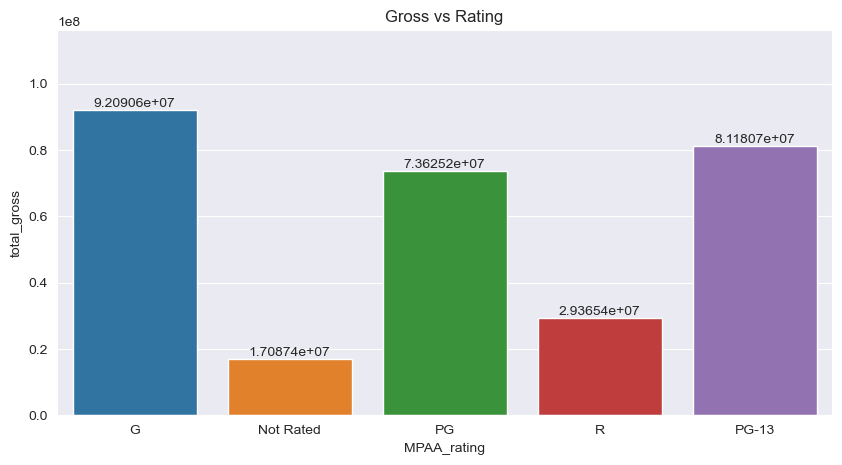

In [48]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
ax = sns.barplot(x= 'MPAA_rating', y= 'total_gross', data = total_gross, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Gross vs Rating')
plt.show()
           

* The most frequent movie rating is `PG RATING` with **187** records, comes next `PG-13 RATTING` with **145** records.
* Although it is the least frequent rating with **86** records, `G Rated` movies are responsible for higher `total_gross` than other ratings. 

****

### Q2: How has this changed through the decades

* Adding a new column `Year` to the `Dataframe`

In [49]:
total_gross['Year'] = total_gross['release_date'].dt.year

In [50]:
total_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,Year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


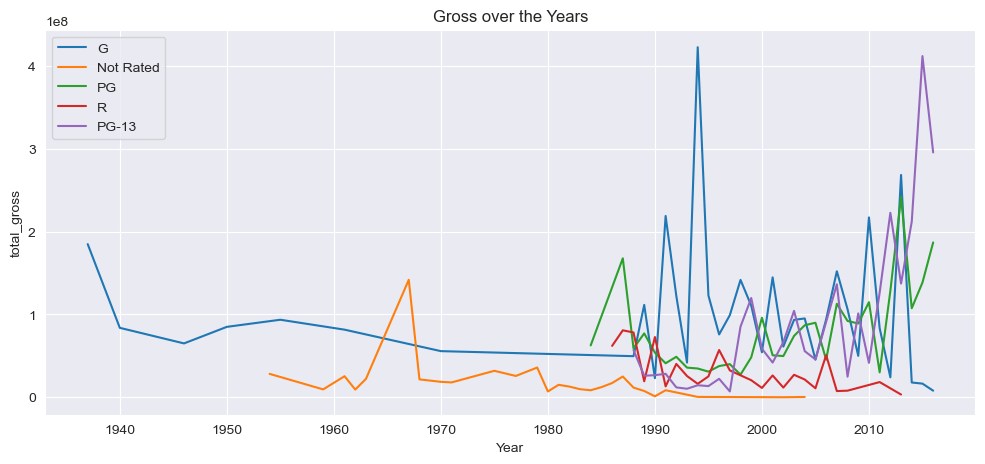

In [51]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
ax = sns.lineplot(x= 'Year', y= 'total_gross', hue='MPAA_rating', data = total_gross, ci=None)
plt.title('Gross over the Years')
plt.legend( loc='upper left')
plt.show()

* During the early ninties `G Rated` movies were the prominent genre in terms of `total_gross`.
* From 2000 to 2010 it was close between `G movies` `PG movies` `PG-13 movies` in terms of `total_revenue`.
* After 2010 `PG-13 movies` were significatly higher in `total_gross` than any other genre.

****

### Q3: Which hero characters generate the highest box office revenues?

In [52]:
# We will merge the two concerned tables "total_gross" and "Characters" into one table called "Total_movies"

total_movies = pd.merge(total_gross, characters, on='movie_title', how='left')

In [53]:
total_movies.head()

,movie_title,release_date_x,genre,MPAA_rating,total_gross,inflation_adjusted_gross,Year,release_date_y,hero,villian,song
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937,1937-12-21,Snow White,Evil Queen,Some Day My Prince Will Come
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940,1940-02-07,Pinocchio,Stromboli,When You Wish upon a Star
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940,1940-11-13,Not Available,Chernabog,Not Available
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946,NaT,NaN,NaN,NaN
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950,1950-02-15,Cinderella,Lady Tremaine,Bibbidi-Bobbidi-Boo


In [54]:
# Dropping duplicated column "release_date" and rename it to its original.

total_movies.drop(columns='release_date_y', inplace=True)
total_movies.rename(columns={'release_date_x':'release_date'},inplace=True )

In [55]:
# Arranging table in descending order based on total_gross

total_movies.sort_values(by='total_gross', ascending=False, ignore_index=True, inplace=True)
total_movies.head(10)

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,Year,hero,villian,song
0,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015,NaN,NaN,NaN
1,The Avengers,2012-05-04,Action,PG-13,623279547,660081224,2012,NaN,NaN,NaN
2,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936,2016,NaN,NaN,NaN
3,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561,2016,NaN,NaN,NaN
4,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,459005868,2015,NaN,NaN,NaN
5,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,423315812,544817142,2006,NaN,NaN,NaN
6,The Lion King,1994-06-15,Adventure,G,422780140,761640898,1994,Simba,Scar,Circle of Life
7,Toy Story 3,2010-06-18,Adventure,G,415004880,443408255,2010,NaN,NaN,NaN
8,Iron Man 3,2013-05-03,Action,PG-13,408992272,424084233,2013,NaN,NaN,NaN
9,Captain America: Civil War,2016-05-06,Action,PG-13,408084349,408084349,2016,NaN,NaN,NaN


* The top 10 movies in revenue are not supported by a hero character name except for `The Lion King` movie.

****

### Q4: Which genre is responsible for the highest revenue?

In [56]:
total_gross.head()

,movie_title,release_date,genre,MPAA_rating,total_gross,inflation_adjusted_gross,Year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


In [57]:
highest_genre = total_gross.groupby('genre')['total_gross'].sum().nlargest(3)
highest_genre

genre
Adventure    16389069453
Comedy        8119619678
Action        4184563282
Name: total_gross, dtype: int64

* `Adventure` genre is responsible for the highest revenue , `Comedy` comes second scoring almost half of its precedent.

****